In [1]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')

from wordcloud import WordCloud
import math
from operator import itemgetter

import nltk
#nltk.download("punkt")
#nltk.download("stopwords")
import string
import seaborn as sns
%matplotlib inline 

###### 1 - Pulizia dati

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
# Get all names 
for col_name in df.columns: 
    print(col_name)

reviewId
content
score
thumbsUpCount
reviewCreatedVersion
at
replyContent
repliedAt
predicted_category
sentiment


In [4]:
len(df.columns)

10

In [5]:
len(df)

43735

In [9]:
df.drop(['replyContent', 'repliedAt'], axis=1, inplace=True)

In [11]:
for col_name in df.columns: 
    print(col_name)

reviewId
content
score
thumbsUpCount
reviewCreatedVersion
time
predicted_category
sentiment


In [10]:
df.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,time,predicted_category,sentiment
0,326d4bdd-8fc6-4d64-b3bf-ce393fb2ae9b,woww,5,0,NaN,2022-08-16 05:55:38,USER_EXPERIENCE,NEUTRAL
1,4bbf741b-2f69-43cd-bb76-f9b5f84c83b5,let me know more details about this,3,0,4.5.1143533,2022-08-16 04:44:45,CONTENT,NEUTRAL
2,3cb1136d-e7c6-4999-aa84-fdc7bcdccf56,i've been using this for a while and there's a...,2,0,4.5.1143533,2022-08-16 04:05:27,INTERFACE,NEGATIVE
3,d6f80f05-a6e8-44f3-a380-7c59ed3d208b,good,2,0,4.5.1143533,2022-08-16 00:22:33,USER_EXPERIENCE,POSITIVE
4,eecb277c-c658-4b2d-86c9-77d3a7022cac,mjkobe,5,0,4.5.1143533,2022-08-15 20:08:25,USER_EXPERIENCE,NEUTRAL


In [7]:
df.rename(columns={'at': 'time'}, inplace=True)

In [12]:
df

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,time,predicted_category,sentiment
0,326d4bdd-8fc6-4d64-b3bf-ce393fb2ae9b,woww,5,0,NaN,2022-08-16 05:55:38,USER_EXPERIENCE,NEUTRAL
1,4bbf741b-2f69-43cd-bb76-f9b5f84c83b5,let me know more details about this,3,0,4.5.1143533,2022-08-16 04:44:45,CONTENT,NEUTRAL
2,3cb1136d-e7c6-4999-aa84-fdc7bcdccf56,i've been using this for a while and there's a...,2,0,4.5.1143533,2022-08-16 04:05:27,INTERFACE,NEGATIVE
3,d6f80f05-a6e8-44f3-a380-7c59ed3d208b,good,2,0,4.5.1143533,2022-08-16 00:22:33,USER_EXPERIENCE,POSITIVE
4,eecb277c-c658-4b2d-86c9-77d3a7022cac,mjkobe,5,0,4.5.1143533,2022-08-15 20:08:25,USER_EXPERIENCE,NEUTRAL
...,...,...,...,...,...,...,...,...
43730,62b0dffe-92ad-489e-a7ca-245fdd1b0705,when using this app.....my mind gone absolutel...,5,0,4.5.1147573,2022-09-27 22:15:14,USER_EXPERIENCE,POSITIVE
43731,f99f67b8-3d65-4c31-913f-170b0c10ddba,so far its not bad,5,0,4.5.1141280,2022-09-27 21:41:17,USER_EXPERIENCE,POSITIVE
43732,b6aa94d9-11f5-406a-a3e0-ca6b69dc5716,good,5,0,4.5.1147573,2022-09-27 20:57:51,USER_EXPERIENCE,POSITIVE
43733,7ec701b6-5911-41c4-b153-cdab6438a634,"it is a great app with no bugs or issues,most ...",5,0,NaN,2022-09-27 20:44:16,CONTENT,POSITIVE


Rimuoviamo le colonne vuote e quelle non utili ai fini dell'analisi

Rimuovo i tweets ai quali non è associato nessun hashtag

Date di raccolta dei tweet

In [13]:
print(min(df["time"]))
print(max(df["time"]))

2015-06-24 14:30:59
2022-10-04 15:29:30


Numero di utenti

In [14]:
len(df["reviewId"].drop_duplicates())


43735

In [16]:
print(min(df["score"]))
print(max(df["score"]))

1
5


In [17]:
print(min(df["thumbsUpCount"]))
print(max(df["thumbsUpCount"]))

0
561


In [18]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43735 entries, 0 to 43734
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              43735 non-null  object
 1   content               43735 non-null  object
 2   score                 43735 non-null  int64 
 3   thumbsUpCount         43735 non-null  int64 
 4   reviewCreatedVersion  38797 non-null  object
 5   time                  43735 non-null  object
 6   predicted_category    43735 non-null  object
 7   sentiment             43735 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.7+ MB


In [20]:
#Salvo le modifiche nel df nuovo
df1.to_csv('fff.csv', index=False)

# Analisi dei dati
Verranno analizzate le colonne replies, retweets, likes e hashtags.
Quanti hashtags possiedono i tweets risultati come più condivisi, commentati e piaciuti? 

In [158]:
df = pd.read_csv('fff.csv')

In [6]:
len(df)

16834

In [73]:
df.sort_values(by=['likes_count'], ascending = True, inplace = True)
df.head(28)

,date,user_id,tweet,language,replies_count,retweets_count,likes_count,hashtags
9444,2020-06-20,1247484756314542082,17 year old climate and environmental activist...,en,1,1,0,"['climatestrike', 'fridaysforfuture', 'schools..."
14810,2019-10-10,3618321977,THIS FRIDAY OCT. 11TH: WEEK 30 of #CarStrikeFr...,en,1,2,0,"['carstrikefridays', 'fossilfuels', 'climateac..."
6214,2021-02-20,1267303512884613121,#ClimateStrike because we should be talking ab...,en,1,1,0,"['climatestrike', 'nomoreemptypromises', 'frid..."
6710,2021-01-13,801427383723106305,@SuzlCarp @ruthhayhurst @1o5Climate @parents4f...,en,1,2,0,"['ccs', 'fossilfuel', 'climatecrisis', 'covid19']"
3172,2021-11-05,110685556,🚧 ROAD CLOSURES 🚧 We've got all you need to k...,en,1,1,0,"['fridaysforfuture', 'cop26']"
12932,2019-12-11,9019142,#GretaThunberg and the #ClimateChange Global #...,en,1,1,0,"['gretathunberg', 'climatechange', 'schoolstri..."
13606,2019-11-22,1336769564,@michaeldbard @UUtah @FFF_UT @FFF_USA @Fridays...,en,0,2,0,"['globalclimatestrike', 'fridaysforfuture', 's..."
14870,2019-10-06,1145073627978768384,Today ive decided to draw #GretaThunberg becau...,en,1,1,0,"['gretathunberg', 'fridaysforfuture', 'unitebe..."
16626,2019-09-20,104914298,#TreeofLife mural was unveiled today. I have m...,en,0,1,0,"['treeoflife', 'blumorpho', 'climateaction', '..."
9965,2020-05-08,2198071040,@300cba @JWSpry @gehtwas63 To my knowledge no ...,en,2,1,0,"['fossilfuels', 'xr', 'greeenpeace', 'pipedrea..."


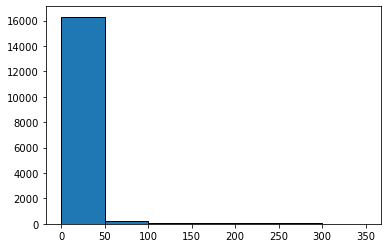

In [104]:
plt.hist(df['replies_count'], edgecolor='k', bins=np.arange(0,400, 50))
plt.show()

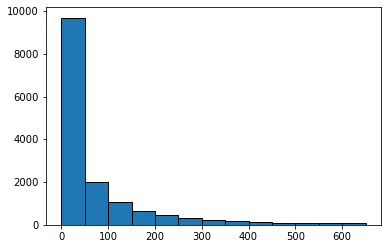

In [127]:
plt.hist(df['likes_count'], edgecolor='k', bins=np.arange(0,700, 50))
plt.show()

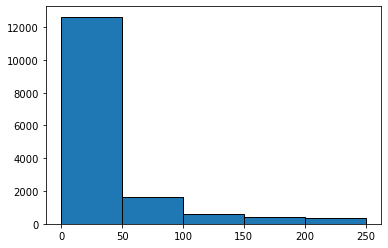

In [121]:
plt.hist(df['retweets_count'], edgecolor='k', bins=np.arange(0,300, 50))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

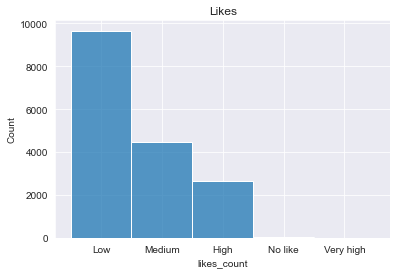

In [207]:
sns.histplot(df['likes_count'])
sns.set_style('darkgrid')
plt.title('Likes')
plt.show

In [273]:
Aoa_gend = pd.crosstab(df['replies_count'], df['likes_count'])
Aoa_gend

likes_count,High,Low,Medium,No like,Very high
replies_count,,,,,
High,91,0,0,0,6
Low,2152,9419,4433,22,0
Medium,405,4,17,0,0
No replies,0,236,33,5,0
Very high,5,0,0,0,6


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

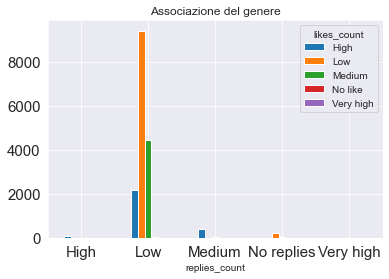

In [274]:
Aoa_gend.plot(kind='bar',stacked=False)
plt.title('Associazione del genere')
plt.xticks(rotation=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot

In [174]:
def get_likes (df):
    if df['likes_count'] ==0:
        return 'No like'
    elif df['likes_count'] ==1 or df['likes_count']<50:
        return 'Low'
    elif df['likes_count'] ==51 or df['likes_count']<300:
        return 'Medium'
    elif df['likes_count'] ==301 or df['likes_count']<60000:
        return 'High'
    elif df['likes_count'] ==60001 or df['likes_count']>60001:
        return 'Very high'

df['likes_count'] = df.apply(lambda x: get_likes(x), axis = 1)
df.head(20)

,date,user_id,tweet,language,replies_count,retweets_count,likes_count,hashtags
0,2022-07-11,3296853818,“INSUFFICIENT ACTION ON CLIMATE CHANGE IS CAUS...,en,1,3,Low,"['climateactionnow', 'peoplenotprofit', 'frida..."
1,2022-07-10,59386332,@ProfStrachan @ECOWARRIORSS @ChristineMilne @m...,en,2,54,Medium,"['fossilfuels', 'wind', 'solar', 'green', 'hyd..."
2,2022-07-10,1500926733582807058,Cut ties with fossil fuels. They’re the key pr...,en,1,42,Medium,"['fridaysforfuture', 'riseupmovement', 'fffmapa']"
3,2022-07-09,1353161840705024001,We have the tools to save the planet from clim...,en,1,7,Low,"['ipcc', 'climatecandidates', 'climateaction',..."
4,2022-07-09,372151755,@xr_cambridge 80% of the world already doesn't...,en,1,4,Low,"['gocarfree', 'istayontheground', 'flightfree'..."
5,2022-07-09,1449429842999525377,Climate striking in school yesterday (photo ta...,en,9,141,High,"['fridaysforfuture', 'peoplenotprofit']"
6,2022-07-09,1101867372221288448,Climate justice approaches promote transformat...,en,3,7,Low,"['climatecrisis', 'climatestrike', 'climateact..."
7,2022-07-09,1442093243835969540,The older generation has failed and it is the ...,en,3,17,Low,"['peoplepower', 'actnow', 'climateaction', 'cl..."
8,2022-07-09,1068957380086587392,#climatestrikeonline Week 121 It’s only a mat...,en,1,4,Low,"['climatestrikeonline', 'climatestrike', 'frid..."
9,2022-07-09,1422452310945509377,#PlantYourAge #ThinkGreenActGreen Development ...,en,2,7,Low,"['plantyourage', 'thinkgreenactgreen', 'climat..."


In [192]:
df[df['retweets_count']=='Very high']

,date,user_id,tweet,language,replies_count,retweets_count,likes_count,hashtags
3045,2021-11-05,1006419421244678144,Wow. This is truly what people power looks lik...,en,High,Very high,Very high,"['fridaysforfuture', 'uprootthesystem']"
12947,2019-12-11,1006419421244678144,"Wow, this is unbelievable! I share this great ...",en,Very high,Very high,Very high,"['fridaysforfuture', 'climatestrike']"
13026,2019-12-07,1006419421244678144,500’000 people marched in Madrid last night. T...,en,Very high,Very high,Very high,"['cop25', 'fridaysforfuture', 'climatestrike']"
15142,2019-09-28,1006419421244678144,Early numbers confirm at least 7 million peopl...,en,High,Very high,Very high,"['weekforfuture', 'weekforfuture', 'climatestr..."
15782,2019-09-27,1006419421244678144,Incredible pictures from all over Italy! This ...,en,High,Very high,Very high,"['climatestrike', 'fridaysforfuture']"
16034,2019-09-25,1006419421244678144,But don’t waste your time giving them any more...,en,Very high,Very high,Very high,"['fridaysforfuture', 'schoolstrike4climate', '..."
16078,2019-09-25,1006419421244678144,Last Friday over 4 million people striked for ...,en,Very high,Very high,Very high,"['weekforfuture', 'fridaysforfuture', 'climate..."
16358,2019-09-21,1006419421244678144,Over 4 million on #ClimateStrike today. In 163...,en,Very high,Very high,Very high,"['climatestrike', 'fridaysforfuture']"
16566,2019-09-20,1006419421244678144,When we say we strike on all continents - we m...,en,High,Very high,Very high,"['fridaysforfuture', 'climatestrike']"
16580,2019-09-20,1006419421244678144,The preliminary numbers say there are at least...,en,High,Very high,Very high,"['climatestrike', 'fridaysforfuture']"


In [180]:
def get_replies (df):
    if df['replies_count'] ==0:
        return 'No replies'
    elif df['replies_count'] ==1 or df['replies_count']<50:
        return 'Low'
    elif df['replies_count'] ==51 or df['replies_count']<300:
        return 'Medium'
    elif df['replies_count'] ==301 or df['replies_count']<1500:
        return 'High'
    elif df['replies_count'] ==1501 or df['replies_count']>1501:
        return 'Very high'

df['replies_count'] = df.apply(lambda x: get_replies(x), axis = 1)
df.head(20)

,date,user_id,tweet,language,replies_count,retweets_count,likes_count,hashtags
0,2022-07-11,3296853818,“INSUFFICIENT ACTION ON CLIMATE CHANGE IS CAUS...,en,Low,3,Low,"['climateactionnow', 'peoplenotprofit', 'frida..."
1,2022-07-10,59386332,@ProfStrachan @ECOWARRIORSS @ChristineMilne @m...,en,Low,54,Medium,"['fossilfuels', 'wind', 'solar', 'green', 'hyd..."
2,2022-07-10,1500926733582807058,Cut ties with fossil fuels. They’re the key pr...,en,Low,42,Medium,"['fridaysforfuture', 'riseupmovement', 'fffmapa']"
3,2022-07-09,1353161840705024001,We have the tools to save the planet from clim...,en,Low,7,Low,"['ipcc', 'climatecandidates', 'climateaction',..."
4,2022-07-09,372151755,@xr_cambridge 80% of the world already doesn't...,en,Low,4,Low,"['gocarfree', 'istayontheground', 'flightfree'..."
5,2022-07-09,1449429842999525377,Climate striking in school yesterday (photo ta...,en,Low,141,High,"['fridaysforfuture', 'peoplenotprofit']"
6,2022-07-09,1101867372221288448,Climate justice approaches promote transformat...,en,Low,7,Low,"['climatecrisis', 'climatestrike', 'climateact..."
7,2022-07-09,1442093243835969540,The older generation has failed and it is the ...,en,Low,17,Low,"['peoplepower', 'actnow', 'climateaction', 'cl..."
8,2022-07-09,1068957380086587392,#climatestrikeonline Week 121 It’s only a mat...,en,Low,4,Low,"['climatestrikeonline', 'climatestrike', 'frid..."
9,2022-07-09,1422452310945509377,#PlantYourAge #ThinkGreenActGreen Development ...,en,Low,7,Low,"['plantyourage', 'thinkgreenactgreen', 'climat..."


In [186]:
def get_retweets (df):
    if df['retweets_count'] ==0:
        return 'No retweet'
    elif df['retweets_count'] ==1 or df['retweets_count']<50:
        return 'Low'
    elif df['retweets_count'] ==51 or df['retweets_count']<300:
        return 'Medium'
    elif df['retweets_count'] ==301 or df['retweets_count']<10000:
        return 'High'
    elif df['retweets_count'] ==10001 or df['retweets_count']>10001:
        return 'Very high'

df['retweets_count'] = df.apply(lambda x: get_retweets(x), axis = 1)
df.head(20)

,date,user_id,tweet,language,replies_count,retweets_count,likes_count,hashtags
0,2022-07-11,3296853818,“INSUFFICIENT ACTION ON CLIMATE CHANGE IS CAUS...,en,Low,Low,Low,"['climateactionnow', 'peoplenotprofit', 'frida..."
1,2022-07-10,59386332,@ProfStrachan @ECOWARRIORSS @ChristineMilne @m...,en,Low,Medium,Medium,"['fossilfuels', 'wind', 'solar', 'green', 'hyd..."
2,2022-07-10,1500926733582807058,Cut ties with fossil fuels. They’re the key pr...,en,Low,Low,Medium,"['fridaysforfuture', 'riseupmovement', 'fffmapa']"
3,2022-07-09,1353161840705024001,We have the tools to save the planet from clim...,en,Low,Low,Low,"['ipcc', 'climatecandidates', 'climateaction',..."
4,2022-07-09,372151755,@xr_cambridge 80% of the world already doesn't...,en,Low,Low,Low,"['gocarfree', 'istayontheground', 'flightfree'..."
5,2022-07-09,1449429842999525377,Climate striking in school yesterday (photo ta...,en,Low,Medium,High,"['fridaysforfuture', 'peoplenotprofit']"
6,2022-07-09,1101867372221288448,Climate justice approaches promote transformat...,en,Low,Low,Low,"['climatecrisis', 'climatestrike', 'climateact..."
7,2022-07-09,1442093243835969540,The older generation has failed and it is the ...,en,Low,Low,Low,"['peoplepower', 'actnow', 'climateaction', 'cl..."
8,2022-07-09,1068957380086587392,#climatestrikeonline Week 121 It’s only a mat...,en,Low,Low,Low,"['climatestrikeonline', 'climatestrike', 'frid..."
9,2022-07-09,1422452310945509377,#PlantYourAge #ThinkGreenActGreen Development ...,en,Low,Low,Low,"['plantyourage', 'thinkgreenactgreen', 'climat..."


In [173]:
df = pd.read_csv('fff.csv')

In [210]:
df

,date,user_id,tweet,language,replies_count,retweets_count,likes_count,hashtags
0,2022-07-11,3296853818,“INSUFFICIENT ACTION ON CLIMATE CHANGE IS CAUS...,en,Low,Low,Low,"['climateactionnow', 'peoplenotprofit', 'frida..."
1,2022-07-10,59386332,@ProfStrachan @ECOWARRIORSS @ChristineMilne @m...,en,Low,Medium,Medium,"['fossilfuels', 'wind', 'solar', 'green', 'hyd..."
2,2022-07-10,1500926733582807058,Cut ties with fossil fuels. They’re the key pr...,en,Low,Low,Medium,"['fridaysforfuture', 'riseupmovement', 'fffmapa']"
3,2022-07-09,1353161840705024001,We have the tools to save the planet from clim...,en,Low,Low,Low,"['ipcc', 'climatecandidates', 'climateaction',..."
4,2022-07-09,372151755,@xr_cambridge 80% of the world already doesn't...,en,Low,Low,Low,"['gocarfree', 'istayontheground', 'flightfree'..."
...,...,...,...,...,...,...,...,...
16829,2019-09-20,198902989,If you are a student protesting during the #cl...,en,Low,Low,Low,"['climatestrike', 'knowyourrights', 'fridayfor..."
16830,2019-09-20,1020395456415830016,Heya @LourdesFaberes @neilhimself @terryandrob...,en,Low,Low,High,"['globalclimatestrike', 'fridaysforfuture']"
16831,2019-09-20,33933259,The world is listening and the message is clea...,en,Low,Medium,High,"['climateaction', 'fridaysforfuture']"
16832,2019-09-20,25341283,@A2larm @zewlakk_foto @globalgreens @nicohaeri...,en,Low,Low,Low,"['klimaatstaking', 'klimastreik', 'climatestri..."


In [423]:
df['number_hashtags'] = df.hashtags.apply(lambda x: len(x.split()))
df

,date,user_id,tweet,language,replies_count,retweets_count,likes_count,hashtags,number_hashtags
0,2022-07-11,3296853818,“INSUFFICIENT ACTION ON CLIMATE CHANGE IS CAUS...,en,Low,Low,Low,"['climateactionnow', 'peoplenotprofit', 'frida...",3
1,2022-07-10,59386332,@ProfStrachan @ECOWARRIORSS @ChristineMilne @m...,en,Low,Medium,Medium,"['fossilfuels', 'wind', 'solar', 'green', 'hyd...",13
2,2022-07-10,1500926733582807058,Cut ties with fossil fuels. They’re the key pr...,en,Low,Low,Medium,"['fridaysforfuture', 'riseupmovement', 'fffmapa']",3
3,2022-07-09,1353161840705024001,We have the tools to save the planet from clim...,en,Low,Low,Low,"['ipcc', 'climatecandidates', 'climateaction',...",5
4,2022-07-09,372151755,@xr_cambridge 80% of the world already doesn't...,en,Low,Low,Low,"['gocarfree', 'istayontheground', 'flightfree'...",7
...,...,...,...,...,...,...,...,...,...
16829,2019-09-20,198902989,If you are a student protesting during the #cl...,en,Low,Low,Low,"['climatestrike', 'knowyourrights', 'fridayfor...",3
16830,2019-09-20,1020395456415830016,Heya @LourdesFaberes @neilhimself @terryandrob...,en,Low,Low,High,"['globalclimatestrike', 'fridaysforfuture']",2
16831,2019-09-20,33933259,The world is listening and the message is clea...,en,Low,Medium,High,"['climateaction', 'fridaysforfuture']",2
16832,2019-09-20,25341283,@A2larm @zewlakk_foto @globalgreens @nicohaeri...,en,Low,Low,Low,"['klimaatstaking', 'klimastreik', 'climatestri...",3


In [419]:
#Dataset con le features likes, retweets e replies suddivise in 5 categorie
df.to_csv('fff_lev.csv', index=False)

In [420]:
df = pd.read_csv('fff_lev.csv')
df

,date,user_id,tweet,language,replies_count,retweets_count,likes_count,hashtags,number_hashtags
0,2022-07-11,3296853818,“INSUFFICIENT ACTION ON CLIMATE CHANGE IS CAUS...,en,Low,Low,Low,"['climateactionnow', 'peoplenotprofit', 'frida...",3
1,2022-07-10,59386332,@ProfStrachan @ECOWARRIORSS @ChristineMilne @m...,en,Low,Medium,Medium,"['fossilfuels', 'wind', 'solar', 'green', 'hyd...",13
2,2022-07-10,1500926733582807058,Cut ties with fossil fuels. They’re the key pr...,en,Low,Low,Medium,"['fridaysforfuture', 'riseupmovement', 'fffmapa']",3
3,2022-07-09,1353161840705024001,We have the tools to save the planet from clim...,en,Low,Low,Low,"['ipcc', 'climatecandidates', 'climateaction',...",5
4,2022-07-09,372151755,@xr_cambridge 80% of the world already doesn't...,en,Low,Low,Low,"['gocarfree', 'istayontheground', 'flightfree'...",7
...,...,...,...,...,...,...,...,...,...
16829,2019-09-20,198902989,If you are a student protesting during the #cl...,en,Low,Low,Low,"['climatestrike', 'knowyourrights', 'fridayfor...",3
16830,2019-09-20,1020395456415830016,Heya @LourdesFaberes @neilhimself @terryandrob...,en,Low,Low,High,"['globalclimatestrike', 'fridaysforfuture']",2
16831,2019-09-20,33933259,The world is listening and the message is clea...,en,Low,Medium,High,"['climateaction', 'fridaysforfuture']",2
16832,2019-09-20,25341283,@A2larm @zewlakk_foto @globalgreens @nicohaeri...,en,Low,Low,Low,"['klimaatstaking', 'klimastreik', 'climatestri...",3


In [426]:
df.sort_values(by=['number_hashtags'], ascending = False, inplace = True)
df.head(50)

,date,user_id,tweet,language,replies_count,retweets_count,likes_count,hashtags,number_hashtags
6063,2021-03-06,1166444989791948800,Shop #sustainmefacemask ⬇️ https://t.co/gyCNc...,en,Low,Low,Low,"['sustainmefacemask', 'blackownedbusiness', 'b...",26
13859,2019-11-11,113397536,"Movement and #music, not bad🎸#CircularEconomy ...",en,Low,Low,Low,"['music', 'circulareconomy', 'climatestrike', ...",24
15649,2019-09-27,934775857,#NEW #ALBUM #release #today #TurasCumadóir #Ir...,en,Low,Low,Low,"['new', 'album', 'release', 'today', 'turascum...",23
640,2022-05-20,1258782156580683777,#Happy 😀#WorldBeeDay 🐝 #Bee #Vegan 💚for the #...,en,Low,Low,Low,"['happy', 'worldbeeday', 'bee', 'vegan', 'bees...",23
610,2022-05-26,1258782156580683777,Happy #Vegan #Birthday @LennyKravitz Thanks ...,en,Low,Low,Low,"['vegan', 'birthday', 'vegan', 'love', 'animal...",22
48,2022-07-08,1180912929690050560,As #humans reduce #variation &amp; #biodiversi...,en,Low,Low,Low,"['humans', 'variation', 'biodiversity', 'natur...",22
659,2022-05-20,1258782156580683777,#Happy #Birthday #Cher ❤️ Go #Vegan 💚for #Lif...,en,Low,Low,Low,"['happy', 'birthday', 'cher', 'vegan', 'life',...",21
5335,2021-05-07,1180912929690050560,We're looking at GREENWASHING today🙄 #Sustaina...,en,Low,Low,Low,"['sustainability', 'sustainable', 'homeschooli...",21
14109,2019-11-01,479398450,This #US oil major has been told to cut #produ...,en,Low,Low,Low,"['us', 'production', 'green', 'exxonmobil', 'o...",21
5467,2021-04-24,1166444989791948800,Shop #sustainmeecofriendlytshirt ⬇️ https://t...,en,Low,Medium,Low,"['sustainmeecofriendlytshirt', 'sustainme', 's...",21


<function matplotlib.pyplot.show(close=None, block=None)>

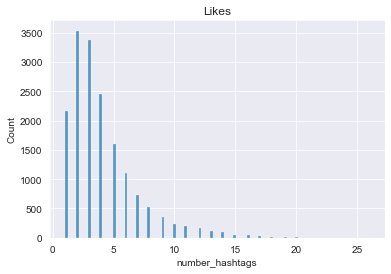

In [427]:
sns.histplot(df['number_hashtags'])
sns.set_style('darkgrid')
plt.title('Likes')
plt.show

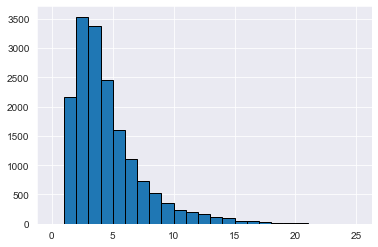

In [429]:
plt.hist(df['number_hashtags'], edgecolor='k', bins=np.arange(0,26, 1))
plt.show()

In [434]:
tab = pd.crosstab(df['number_hashtags'], df['likes_count'])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

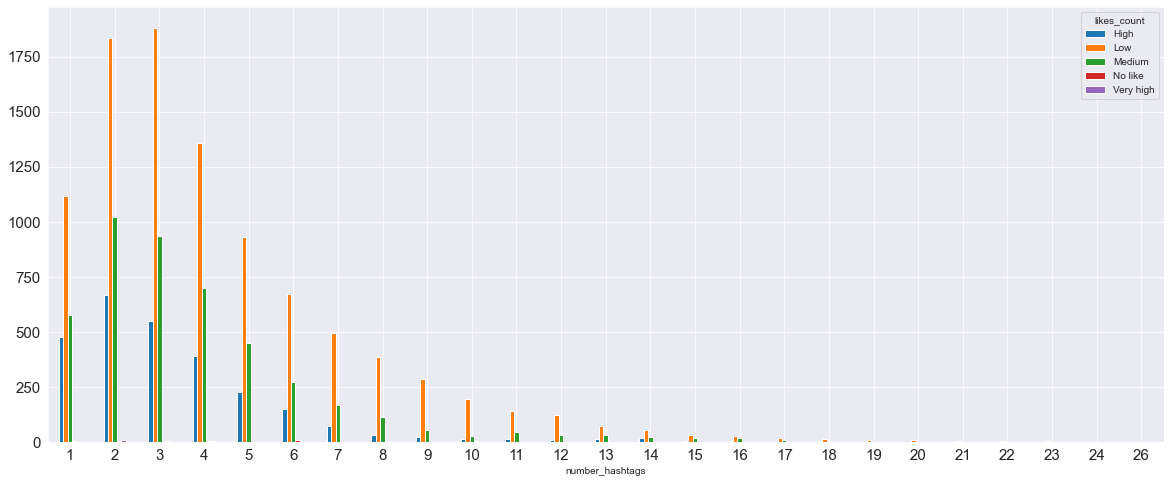

In [440]:
tab.plot(kind='bar',stacked = False, figsize=(20, 8))

plt.xticks(rotation=0)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot

In [442]:
df[df['likes_count']=='Very high']

,date,user_id,tweet,language,replies_count,retweets_count,likes_count,hashtags,number_hashtags
16034,2019-09-25,1006419421244678144,But don’t waste your time giving them any more...,en,Very high,Very high,Very high,"['fridaysforfuture', 'schoolstrike4climate', '...",4
15142,2019-09-28,1006419421244678144,Early numbers confirm at least 7 million peopl...,en,High,Very high,Very high,"['weekforfuture', 'weekforfuture', 'climatestr...",4
1793,2022-03-04,1006419421244678144,School strike week 185. #FridaysForFuture #Cli...,en,Very high,High,Very high,"['fridaysforfuture', 'climatestrike', 'peoplen...",4
16078,2019-09-25,1006419421244678144,Last Friday over 4 million people striked for ...,en,Very high,Very high,Very high,"['weekforfuture', 'fridaysforfuture', 'climate...",3
13026,2019-12-07,1006419421244678144,500’000 people marched in Madrid last night. T...,en,Very high,Very high,Very high,"['cop25', 'fridaysforfuture', 'climatestrike']",3
3045,2021-11-05,1006419421244678144,Wow. This is truly what people power looks lik...,en,High,Very high,Very high,"['fridaysforfuture', 'uprootthesystem']",2
12947,2019-12-11,1006419421244678144,"Wow, this is unbelievable! I share this great ...",en,Very high,Very high,Very high,"['fridaysforfuture', 'climatestrike']",2
15782,2019-09-27,1006419421244678144,Incredible pictures from all over Italy! This ...,en,High,Very high,Very high,"['climatestrike', 'fridaysforfuture']",2
16566,2019-09-20,1006419421244678144,When we say we strike on all continents - we m...,en,High,Very high,Very high,"['fridaysforfuture', 'climatestrike']",2
16608,2019-09-20,1006419421244678144,New York City is looking huge! Lower Manhattan...,en,High,High,Very high,"['climatestrike', 'fridaysforfuture']",2


In [444]:
df[df['retweets_count']=='Very high']

,date,user_id,tweet,language,replies_count,retweets_count,likes_count,hashtags,number_hashtags
16034,2019-09-25,1006419421244678144,But don’t waste your time giving them any more...,en,Very high,Very high,Very high,"['fridaysforfuture', 'schoolstrike4climate', '...",4
15142,2019-09-28,1006419421244678144,Early numbers confirm at least 7 million peopl...,en,High,Very high,Very high,"['weekforfuture', 'weekforfuture', 'climatestr...",4
16078,2019-09-25,1006419421244678144,Last Friday over 4 million people striked for ...,en,Very high,Very high,Very high,"['weekforfuture', 'fridaysforfuture', 'climate...",3
13026,2019-12-07,1006419421244678144,500’000 people marched in Madrid last night. T...,en,Very high,Very high,Very high,"['cop25', 'fridaysforfuture', 'climatestrike']",3
3045,2021-11-05,1006419421244678144,Wow. This is truly what people power looks lik...,en,High,Very high,Very high,"['fridaysforfuture', 'uprootthesystem']",2
12947,2019-12-11,1006419421244678144,"Wow, this is unbelievable! I share this great ...",en,Very high,Very high,Very high,"['fridaysforfuture', 'climatestrike']",2
15782,2019-09-27,1006419421244678144,Incredible pictures from all over Italy! This ...,en,High,Very high,Very high,"['climatestrike', 'fridaysforfuture']",2
16566,2019-09-20,1006419421244678144,When we say we strike on all continents - we m...,en,High,Very high,Very high,"['fridaysforfuture', 'climatestrike']",2
16580,2019-09-20,1006419421244678144,The preliminary numbers say there are at least...,en,High,Very high,Very high,"['climatestrike', 'fridaysforfuture']",2
16358,2019-09-21,1006419421244678144,Over 4 million on #ClimateStrike today. In 163...,en,Very high,Very high,Very high,"['climatestrike', 'fridaysforfuture']",2


In [445]:
df[df['replies_count']=='Very high']

,date,user_id,tweet,language,replies_count,retweets_count,likes_count,hashtags,number_hashtags
10802,2020-03-13,1006419421244678144,School strike week 82. In a crisis we change o...,en,Very high,High,High,"['digitalstrike', 'climatestrikeonline', 'scho...",6
16034,2019-09-25,1006419421244678144,But don’t waste your time giving them any more...,en,Very high,Very high,Very high,"['fridaysforfuture', 'schoolstrike4climate', '...",4
1793,2022-03-04,1006419421244678144,School strike week 185. #FridaysForFuture #Cli...,en,Very high,High,Very high,"['fridaysforfuture', 'climatestrike', 'peoplen...",4
5215,2021-05-14,1006419421244678144,School strike week 143. #MindTheGap #climatest...,en,Very high,High,High,"['mindthegap', 'climatestrikeonline', 'fridays...",4
16078,2019-09-25,1006419421244678144,Last Friday over 4 million people striked for ...,en,Very high,Very high,Very high,"['weekforfuture', 'fridaysforfuture', 'climate...",3
13349,2019-11-29,1006419421244678144,School strike week 67. 42°19’ N 25°03’W #clima...,en,Very high,High,High,"['climatestrike', 'schoolstrike4climate', 'fri...",3
13026,2019-12-07,1006419421244678144,500’000 people marched in Madrid last night. T...,en,Very high,Very high,Very high,"['cop25', 'fridaysforfuture', 'climatestrike']",3
12947,2019-12-11,1006419421244678144,"Wow, this is unbelievable! I share this great ...",en,Very high,Very high,Very high,"['fridaysforfuture', 'climatestrike']",2
16358,2019-09-21,1006419421244678144,Over 4 million on #ClimateStrike today. In 163...,en,Very high,Very high,Very high,"['climatestrike', 'fridaysforfuture']",2
11000,2020-03-04,1006419421244678144,Today I’m addressing the European Commission a...,en,Very high,High,High,"['climatelaw', 'fridaysforfuture']",2
